11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 129s 62ms/step - accuracy: 0.6054 - loss: 1.0898 - val_accuracy: 0.9174 - val_loss: 0.3756
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 132s 61ms/step - accuracy: 0.9468 - loss: 0.2201 - val_accuracy: 0.9759 - val_loss: 0.0978
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - accuracy: 0.9805 - loss: 0.0768 - val_accuracy: 0.9841 - val_loss: 0.0598
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 61ms/step - accuracy: 0.9738 - loss: 0.1077 - val_accuracy: 0.9871 - val_loss: 0.0485
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 61ms/step - accuracy: 0.9885 - loss: 0.0470 - val_accuracy: 0.9883 - val_loss: 0.0482
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 114s 61ms/step - accuracy: 0.9867 - loss: 0.0543 - val_accuracy: 0.9902 - val_loss: 0.0413
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 62ms/step - accuracy: 0.9893 - loss: 0.0440 - val_acc

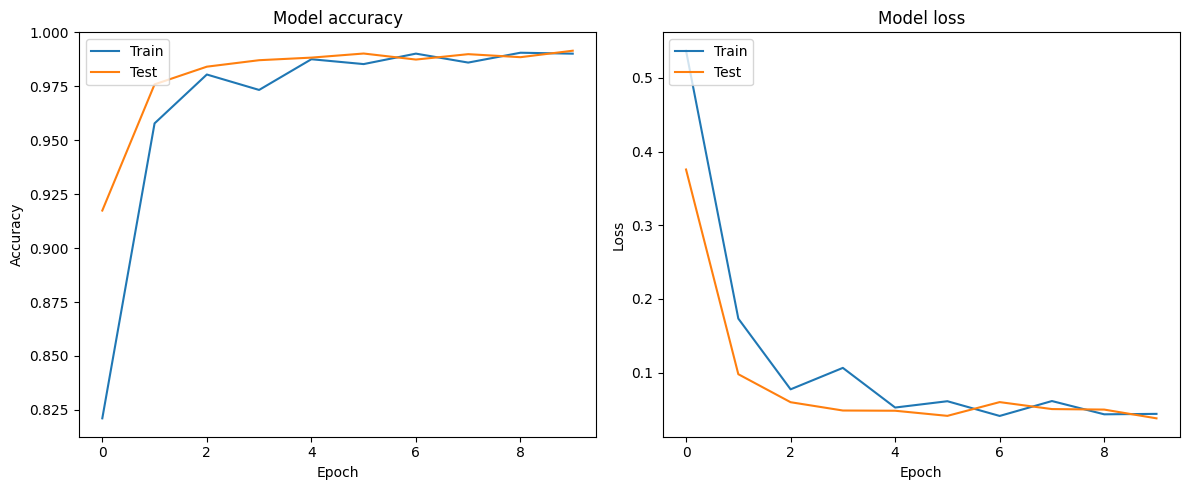

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
y_train = to_categorical(y_train)  # One-hot encoding of labels
y_test = to_categorical(y_test)

# Pad the images to match the input size of VGG19 (48x48, you might want to increase this in practice)
x_train = np.pad(x_train, ((0, 0), (10, 10), (10, 10)), mode='constant', constant_values=255)
x_test = np.pad(x_test, ((0, 0), (10, 10), (10, 10)), mode='constant', constant_values=255)

# Convert grayscale images to RGB by stacking the image three times along the last axis
x_train = np.stack([x_train] * 3, axis=-1)
x_test = np.stack([x_test] * 3, axis=-1)

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Load VGG19 without the top classification layers
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Create a new model with custom classification layers
model = models.Sequential()

# Add the VGG19 base model
model.add(vgg_model)

# Add flattening and dense layers for classification
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for digits (0-9)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Visualize the model's performance (e.g., loss and accuracy)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


NameError: name 'model' is not defined

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 124s 60ms/step - accuracy: 0.1074 - loss: 2.3293 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 131s 58ms/step - accuracy: 0.1123 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 58ms/step - accuracy: 0.1144 - loss: 2.3011 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 58ms/step - accuracy: 0.1102 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 110s 59ms/step - accuracy: 0.1118 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 58ms/step - accuracy: 0.1126 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 59ms/step - accuracy: 0.1126 - loss: 2.3011 - val_acc

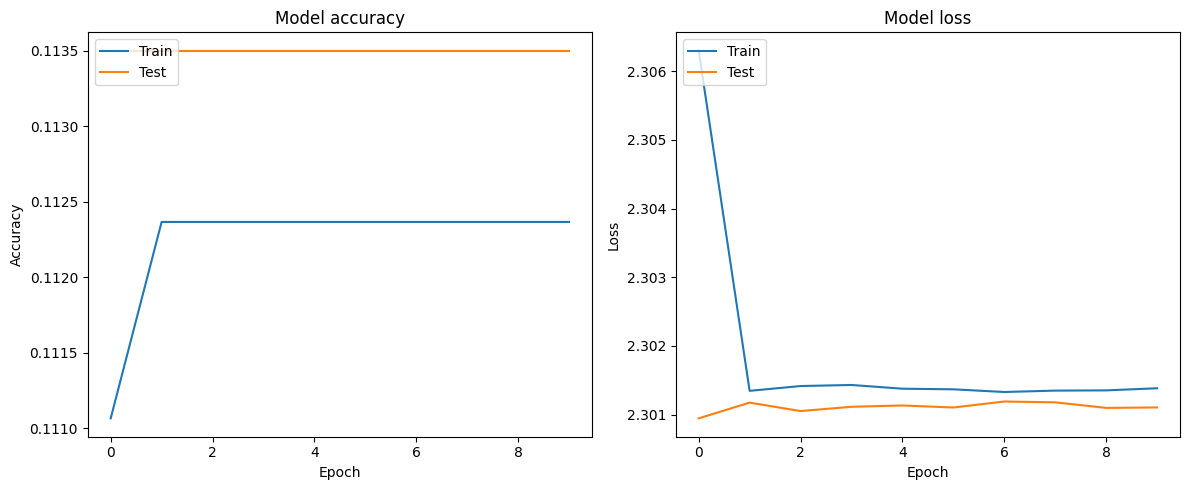

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


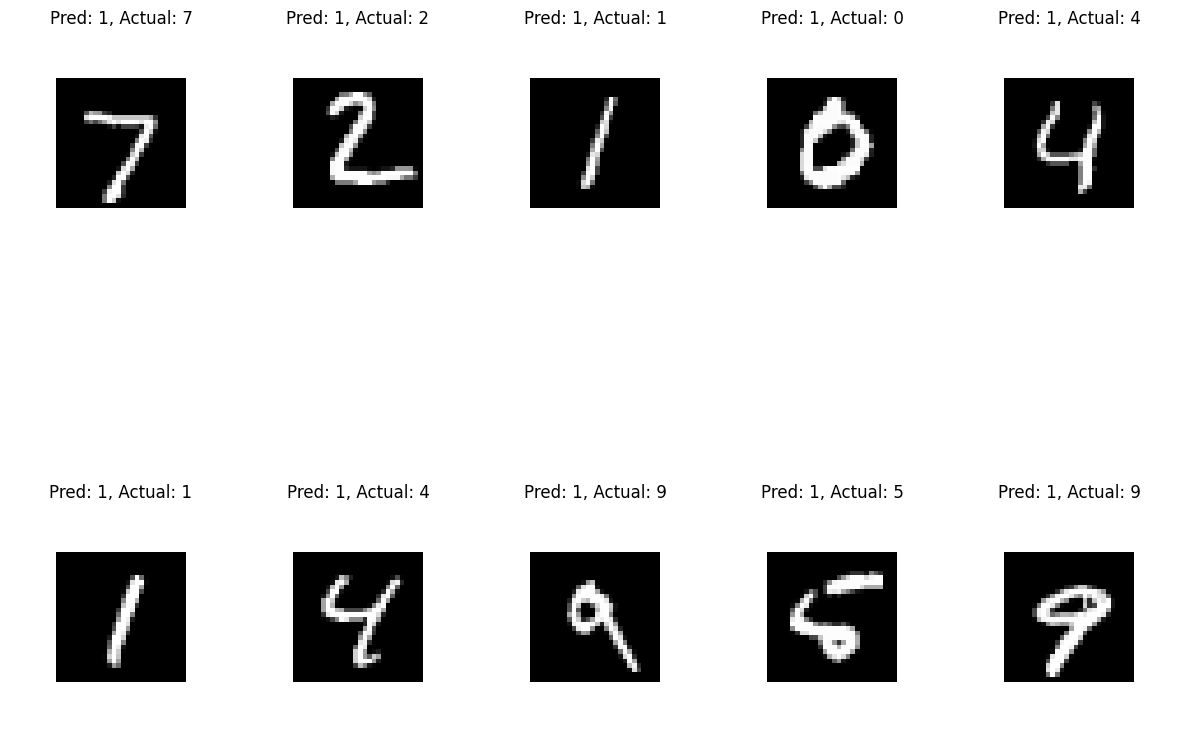

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
y_train = to_categorical(y_train)  # One-hot encoding of labels
y_test = to_categorical(y_test)

# Pad the images to match the input size of VGG19 (48x48, you might want to increase this in practice)
x_train = np.pad(x_train, ((0, 0), (10, 10), (10, 10)), mode='constant', constant_values=255)
x_test = np.pad(x_test, ((0, 0), (10, 10), (10, 10)), mode='constant', constant_values=255)

# Convert grayscale images to RGB by stacking the image three times along the last axis
x_train = np.stack([x_train] * 3, axis=-1)
x_test = np.stack([x_test] * 3, axis=-1)

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Load VGG19 without the top classification layers
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Create a new model with custom classification layers
model = models.Sequential()

# Add the VGG19 base model
model.add(vgg_model)

# Add flattening and dense layers for classification
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes for digits (0-9)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Function to plot accuracy and loss
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Test')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Test')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Function to make predictions and display results
def make_predictions(model, x_test, y_test, num_examples=10):
    # Generate predictions for the test set
    predictions = model.predict(x_test)

    # Get the predicted and actual class labels
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = np.argmax(y_test, axis=1)

    # Display predictions for a few examples
    plt.figure(figsize=(12, 12))
    for i in range(num_examples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].astype("float32"), cmap="gray")
        plt.title(f"Pred: {predicted_classes[i]}, Actual: {actual_classes[i]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(history)

# Make predictions and display the results
make_predictions(model, x_test, y_test, num_examples=10)
